# Machine Learning

**Textbook is available @ [https://www.github.com/a-mhamdi/mlpy](https://www.github.com/a-mhamdi/mlpy)**

---


Artificial neural networks (ANN) are commonly used for classification tasks because they are able to learn complex relationships between the input features and the target class. They are particularly useful when the relationship is non-linear, as they are able to learn and model the inputs-outputs mapping using multiple hidden layers of interconnected neurons.

ANN are also able to handle large amounts of data and can learn from it without being explicitly programmed with a set of rules or a decision tree. This allows them to be very flexible and adaptable, and makes them well-suited for tasks that are difficult to define using traditional programming techniques.

## Binary Classification using ANN

There are several advantages to using neural networks for classification tasks:

1. They are able to learn complex relationships between the input features and the target class;
1. They are able to handle large amounts of data;
1. They can learn from unstructured data;
1. They are flexible and adaptable;
1. They can be trained to perform well on a wide range of classification tasks.

### Importing the libraries


In [1]:
import numpy as np
import pandas as pd

In [2]:
np.set_printoptions(precision=2)

In [3]:
from matplotlib import pyplot as plt
plt.style.use('dark_background')
plt.rc('figure', figsize=(6, 4))

from matplotlib import rcParams
rcParams['font.family'] = 'Comfortaa'
rcParams['font.size'] = 8
rcParams['axes.unicode_minus'] = False

### Importing the dataset


In [4]:
df = pd.read_csv("./datasets/Churn_Modelling.csv")

In [5]:
df = df.dropna(how="any", axis=0) 

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

### Data preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
le = LabelEncoder()
ohe = OneHotEncoder()

In [12]:
X[:, 2] = le.fit_transform(X[:, 2])

In [13]:
from sklearn.compose import ColumnTransformer

In [14]:
ct = ColumnTransformer([("ohe", ohe, [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [15]:
X[:5, :]

array([[1.0, 0.0, 0.0, 619, 0, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 608, 0, 41, 1, 83807.86, 1, 0, 1, 112542.58],
       [1.0, 0.0, 0.0, 502, 0, 42, 8, 159660.8, 3, 1, 0, 113931.57],
       [1.0, 0.0, 0.0, 699, 0, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 850, 0, 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [16]:
X = np.asarray(X, dtype=np.float64)

In [17]:
X[:5, :]

array([[1.00e+00, 0.00e+00, 0.00e+00, 6.19e+02, 0.00e+00, 4.20e+01,
        2.00e+00, 0.00e+00, 1.00e+00, 1.00e+00, 1.00e+00, 1.01e+05],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.08e+02, 0.00e+00, 4.10e+01,
        1.00e+00, 8.38e+04, 1.00e+00, 0.00e+00, 1.00e+00, 1.13e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.02e+02, 0.00e+00, 4.20e+01,
        8.00e+00, 1.60e+05, 3.00e+00, 1.00e+00, 0.00e+00, 1.14e+05],
       [1.00e+00, 0.00e+00, 0.00e+00, 6.99e+02, 0.00e+00, 3.90e+01,
        1.00e+00, 0.00e+00, 2.00e+00, 0.00e+00, 0.00e+00, 9.38e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.50e+02, 0.00e+00, 4.30e+01,
        2.00e+00, 1.26e+05, 1.00e+00, 1.00e+00, 1.00e+00, 7.91e+04]])

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=123)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
sc = MinMaxScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
print(X_train[:5, :])

[[1.   0.   0.   0.75 1.   0.16 1.   0.   0.33 1.   1.   0.27]
 [1.   0.   0.   0.51 0.   0.28 1.   0.   0.67 1.   0.   0.66]
 [0.   0.   1.   0.87 1.   0.23 0.3  0.   0.33 0.   0.   0.41]
 [1.   0.   0.   0.69 1.   0.3  0.9  0.   0.33 1.   0.   0.2 ]
 [1.   0.   0.   0.71 1.   0.2  0.3  0.58 0.33 1.   0.   0.57]]


### Build the classifier `clf`

In [24]:
from keras.models import Sequential
from keras.layers import Dense

2023-12-02 01:03:27.727478: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-02 01:03:27.913435: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-02 01:03:27.913456: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-12-02 01:03:28.838908: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [25]:
clf = Sequential()
ndim = X_train.shape[1]
clf.add(Dense(units=8, activation="relu", input_dim=ndim))
clf.add(Dense(units=4, activation="relu"))
clf.add(Dense(units=4, activation="relu"))
clf.add(Dense(units=1, activation="sigmoid"))

2023-12-02 01:03:29.437644: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-02 01:03:29.437668: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-02 01:03:29.437724: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (e590): /proc/driver/nvidia/version does not exist
2023-12-02 01:03:29.437975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Insights about `clf`

In [26]:
clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 104       
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 165
Trainable params: 165
Non-trainable params: 0
_________________________________________________________________


### Compile `clf`

In [27]:
clf.compile(optimizer="adam", 
            loss="binary_crossentropy", 
            metrics=['Accuracy', 'Precision', 'Recall'])

### Train and evaluate `clf`

In [28]:
clf.fit(X_train, y_train, batch_size=16, epochs=32);

Epoch 1/32
500/500 [==============================] - 1s 1ms/step - loss: 0.5071 - Accuracy: 0.7874 - precision: 0.2400 - recall: 0.0222
Epoch 2/32
500/500 [==============================] - 0s 983us/step - loss: 0.4676 - Accuracy: 0.7970 - precision: 0.0000e+00 - recall: 0.0000e+00
Epoch 3/32
500/500 [==============================] - 1s 1ms/step - loss: 0.4481 - Accuracy: 0.8066 - precision: 0.6450 - recall: 0.1041
Epoch 4/32
500/500 [==============================] - 1s 1ms/step - loss: 0.4236 - Accuracy: 0.8115 - precision: 0.6372 - recall: 0.1645
Epoch 5/32
500/500 [==============================] - 1s 1ms/step - loss: 0.4036 - Accuracy: 0.8151 - precision: 0.6319 - recall: 0.2126
Epoch 6/32
500/500 [==============================] - 1s 1ms/step - loss: 0.3923 - Accuracy: 0.8223 - precision: 0.6583 - recall: 0.2575
Epoch 7/32
500/500 [==============================] - 1s 1ms/step - loss: 0.3846 - Accuracy: 0.8332 - precision: 0.6836 - recall: 0.3315
Epoch 8/32
500/500 [===========

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [30]:
y_pred = clf.predict(X_test)
y_pred = ( y_pred > .5 ).astype(int)

63/63 [==============================] - 0s 779us/step


Print the confusion matrix

In [31]:
cm = confusion_matrix(y_test, y_pred)

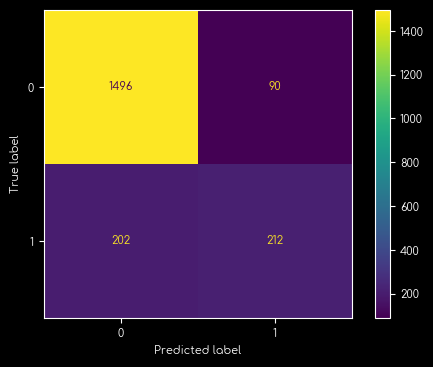

In [32]:
ConfusionMatrixDisplay(cm).plot();

In [33]:
print(y_test.shape)

(2000,)


In [34]:
print(y_pred.shape)
y_pred = y_pred.reshape(len(y_pred),)
print(y_pred.shape)

(2000, 1)
(2000,)


In [35]:
pd.crosstab(y_test, y_pred, rownames=["Expected"], colnames=["Predicted"], margins=True)

Predicted,0,1,All
Expected,,,
0,1496,90,1586
1,202,212,414
All,1698,302,2000


In [36]:
y_test = y_test.reshape(len(y_test), 1)
y_pred = y_pred.reshape(len(y_pred), 1)
print(np.concatenate((y_test[:10], y_pred[:10]), axis=1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]]


In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1586
           1       0.70      0.51      0.59       414

    accuracy                           0.85      2000
   macro avg       0.79      0.73      0.75      2000
weighted avg       0.84      0.85      0.85      2000



It is important to note that neural networks can be more computationally intensive to train and may require more data and more time to achieve good performance, compared to some other classification algorithms. Additionally, they can be more difficult to interpret and understand, as they learn patterns in the data through the weights and biases of the network rather than through explicit rules.